# Метрическая классификация. Метод ближайших соседей и его развитие
# Практическая работа

## Цели практической работы
Научиться:
- строить модель методом ближайших соседей на реальных данных;
- правильно определять качество работы модели.


## Что входит в практическую работу


- Загрузить данные и ознакомиться с ними.
- Изучить данные и провести анализ.
- Разделить данные на обучающую и тестовую выборки.
- Реализовать построение модели с помощью  библиотеки Scikit-learn.
- Подобрать оптимальное число ближайших соседей методом leave-one-out.
- Получить качество модели с помощью F-меры и матрицы сопряжённости.

## Что оценивается

1. Выполнение всех этапов работы.
2. Наличие вывода по результатам.
3. Непереобученность модели.
4. Качество модели.


**Как отправить работу на проверку?**

1. Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачу. 
2. Сохраните изменения при помощи опции Save and Checkpoint из вкладки File или кнопки Save and Checkpoint на панели инструментов. 
3. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.




# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите дамп базы в Postgres. 
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности. 


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

1. Изучите состав БД с помощью инструмента отрисовки ERD-диаграмм (Entity Relationship diagram отображает все сущности БД, а также визуализирует связность таблиц). Соберите датасет следующей структуры из данных, имеющихся в базе:

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

2. Постройте модель зависимости TARGET от остальных параметров получившейся таблицы методом ближайших соседей.

3. Получите качество модели с помощью F-меры и матрицы сопряжённости.

Что нужно сделать после сбора таблицы:

# Сбор таблицы

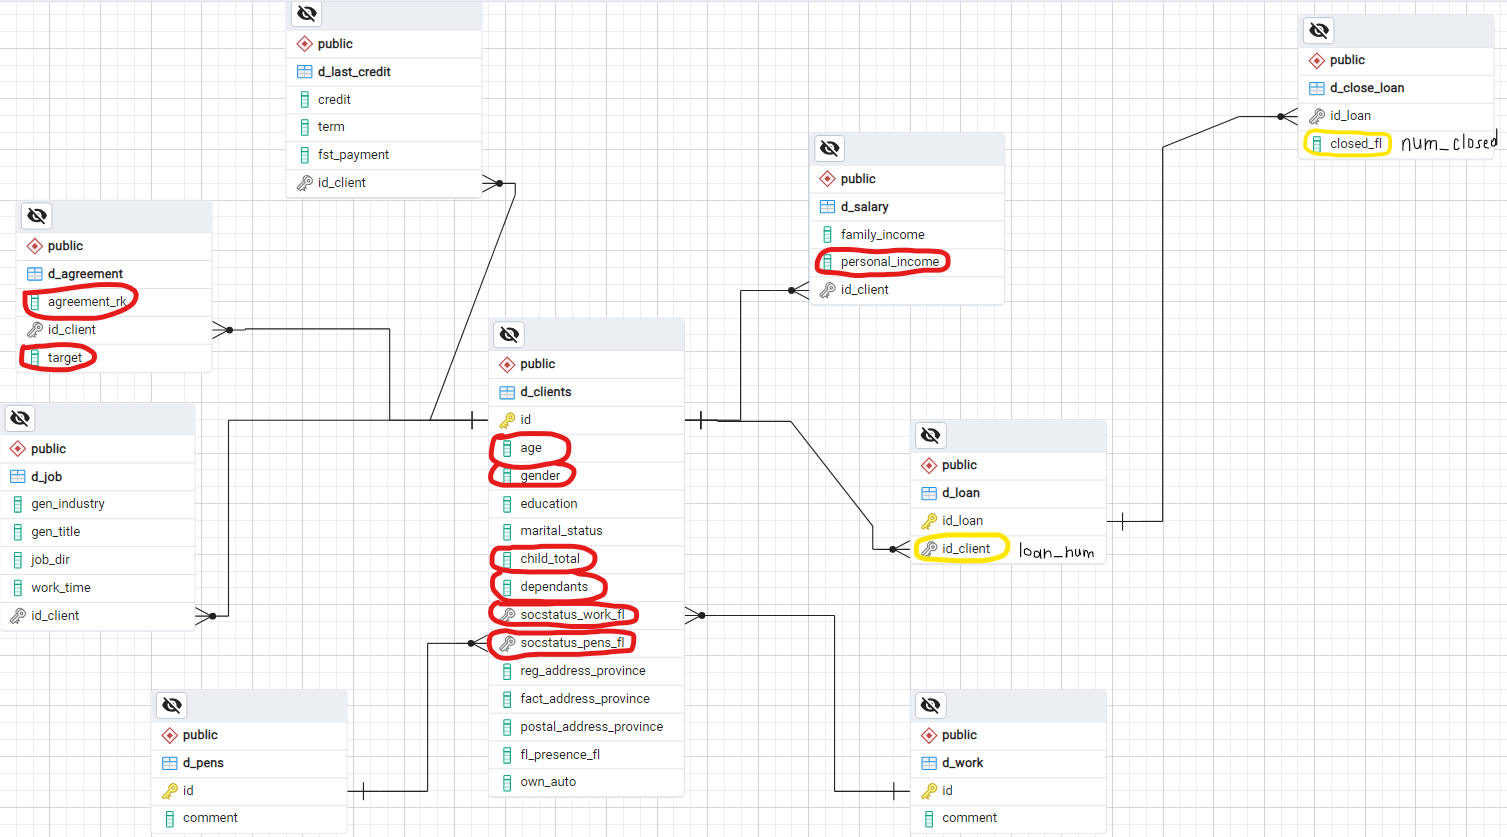

In [1]:
pip install psycopg2-binary

In [2]:
import pandas as pd
import psycopg2 as pg

In [6]:
conn = pg.connect(
    dbname='module_6', user='postgres', password='54326', host='localhost'
)

## d_agreement

In [18]:
query = '''
    SELECT *
    FROM d_agreement;
'''

d_agreement_df = pd.read_sql(query, conn)
d_agreement_df

C:\Users\55317\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,agreement_rk,id_client,target
0,59910150.0,106804370.0,0.0
1,59910230.0,106804371.0,0.0
2,59910525.0,106804372.0,0.0
3,59910803.0,106804373.0,0.0
4,59911781.0,106804374.0,0.0
...,...,...,...
15218,75291424.0,106819588.0,0.0
15219,75291888.0,106819589.0,0.0
15220,75291923.0,106819590.0,0.0
15221,75291960.0,106819591.0,0.0


In [19]:
d_agreement_df[d_agreement_df.duplicated()]

,agreement_rk,id_client,target


In [25]:
d_agreement_df[d_agreement_df.isna().any(axis=1)]

,agreement_rk,id_client,target


In [26]:
d_agreement_df.describe()

,agreement_rk,id_client,target
count,1.522300e+04,1.522300e+04,15223.000000
mean,6.540183e+07,1.068120e+08,0.119030
std,4.568181e+06,4.394646e+03,0.323835
min,5.991015e+07,1.068044e+08,0.000000
25%,6.192092e+07,1.068082e+08,0.000000
50%,6.437100e+07,1.068120e+08,0.000000
75%,6.708802e+07,1.068158e+08,0.000000
max,7.529224e+07,1.068196e+08,1.000000


## d_clients

In [8]:
query = '''
    SELECT *
    FROM d_clients;
'''

d_clients_df = pd.read_sql(query, conn)
d_clients_df

C:\Users\55317\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,age,gender,education,marital_status,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,reg_address_province,fact_address_province,postal_address_province,fl_presence_fl,own_auto
0,106805103.0,42.0,1.0,Среднее,Не состоял в браке,1.0,0.0,2.0,1.0,Московская область,Московская область,Московская область,1.0,0.0
1,106809308.0,28.0,1.0,Среднее специальное,Состою в браке,1.0,1.0,2.0,1.0,Читинская область,Читинская область,Читинская область,0.0,0.0
2,106805867.0,64.0,0.0,Среднее специальное,Состою в браке,2.0,0.0,2.0,2.0,Иркутская область,Иркутская область,Иркутская область,0.0,1.0
3,106808779.0,54.0,1.0,Среднее специальное,Состою в браке,0.0,0.0,2.0,1.0,Новосибирская область,Новосибирская область,Новосибирская область,1.0,1.0
4,106814289.0,26.0,0.0,Среднее специальное,Состою в браке,1.0,1.0,2.0,1.0,Красноярский край,Красноярский край,Красноярский край,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,106814680.0,26.0,1.0,Среднее,Не состоял в браке,1.0,1.0,2.0,1.0,Чувашия,Чувашия,Чувашия,0.0,0.0
15996,106812464.0,26.0,0.0,Среднее специальное,Состою в браке,0.0,0.0,2.0,1.0,Карелия,Карелия,Карелия,0.0,0.0
15997,106809255.0,30.0,1.0,Среднее специальное,Не состоял в браке,0.0,0.0,2.0,1.0,Белгородская область,Белгородская область,Белгородская область,0.0,0.0
15998,106814593.0,25.0,0.0,Среднее специальное,Состою в браке,0.0,0.0,2.0,1.0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0.0,0.0


In [30]:
d_clients_df[d_clients_df.duplicated()]

,id,age,gender,education,marital_status,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,reg_address_province,fact_address_province,postal_address_province,fl_presence_fl,own_auto


In [31]:
d_clients_df[d_clients_df.isna().any(axis=1)]

,id,age,gender,education,marital_status,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,reg_address_province,fact_address_province,postal_address_province,fl_presence_fl,own_auto


In [32]:
d_clients_df.describe(include='all')

,id,age,gender,education,marital_status,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,reg_address_province,fact_address_province,postal_address_province,fl_presence_fl,own_auto
count,1.600000e+04,16000.000000,16000.00000,16000,16000,16000.000000,16000.000000,16000.000000,16000.000000,16000,16000,16000,16000.000000,16000.000000
unique,NaN,NaN,NaN,7,5,NaN,NaN,NaN,NaN,81,81,80,NaN,NaN
top,NaN,NaN,NaN,Среднее специальное,Состою в браке,NaN,NaN,NaN,NaN,Кемеровская область,Кемеровская область,Кемеровская область,NaN,NaN
freq,NaN,NaN,NaN,6844,9888,NaN,NaN,NaN,NaN,715,715,715,NaN,NaN
mean,1.068124e+08,40.394750,0.65325,NaN,NaN,1.097562,0.644437,1.909375,1.134625,NaN,NaN,NaN,0.310188,0.116562
std,4.618946e+03,11.600365,0.47595,NaN,NaN,0.995731,0.811975,0.287084,0.341333,NaN,NaN,NaN,0.462585,0.321298
min,1.068044e+08,21.000000,0.00000,NaN,NaN,0.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000
25%,1.068084e+08,30.000000,0.00000,NaN,NaN,0.000000,0.000000,2.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000
50%,1.068124e+08,39.000000,1.00000,NaN,NaN,1.000000,0.000000,2.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000
75%,1.068164e+08,50.000000,1.00000,NaN,NaN,2.000000,1.000000,2.000000,1.000000,NaN,NaN,NaN,1.000000,0.000000


In [57]:
drop_columns = ['education', 'marital_status', 'reg_address_province', 'fact_address_province', 'postal_address_province', 'fl_presence_fl', 'own_auto']

In [58]:
d_clients_df = d_clients_df.drop(drop_columns, axis=1)

In [60]:
d_clients_df.head()

,id,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl
0,106805103.0,42.0,1.0,1.0,0.0,2.0,1.0
1,106809308.0,28.0,1.0,1.0,1.0,2.0,1.0
2,106805867.0,64.0,0.0,2.0,0.0,2.0,2.0
3,106808779.0,54.0,1.0,0.0,0.0,2.0,1.0
4,106814289.0,26.0,0.0,1.0,1.0,2.0,1.0


## d_salary

In [41]:
query = '''
    SELECT *
    FROM d_salary;
'''

d_salary_df = pd.read_sql(query, conn)
d_salary_df

C:\Users\55317\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,family_income,personal_income,id_client
0,от 20000 до 50000 руб.,20000.0,106809321.0
1,от 20000 до 50000 руб.,14000.0,106815561.0
2,от 10000 до 20000 руб.,15000.0,106811521.0
3,от 20000 до 50000 руб.,20000.0,106811252.0
4,от 20000 до 50000 руб.,25000.0,106808620.0
...,...,...,...
15518,от 20000 до 50000 руб.,15000.0,106812538.0
15519,от 10000 до 20000 руб.,12000.0,106814158.0
15520,от 10000 до 20000 руб.,14000.0,106805134.0
15521,от 10000 до 20000 руб.,7000.0,106812867.0


In [42]:
d_salary_df[d_salary_df.duplicated()]

,family_income,personal_income,id_client
660,от 20000 до 50000 руб.,13000.0,106814811.0
862,от 10000 до 20000 руб.,8000.0,106812620.0
1398,от 20000 до 50000 руб.,10000.0,106810858.0
1541,от 10000 до 20000 руб.,5500.0,106813138.0
2201,от 10000 до 20000 руб.,12000.0,106811456.0
...,...,...,...
15324,от 20000 до 50000 руб.,11000.0,106809457.0
15431,от 10000 до 20000 руб.,12000.0,106811264.0
15475,от 10000 до 20000 руб.,7000.0,106809872.0
15485,от 20000 до 50000 руб.,18000.0,106807192.0


In [44]:
d_salary_df = d_salary_df.drop_duplicates()

In [46]:
d_salary_df[d_salary_df.isna().any(axis=1)]

,family_income,personal_income,id_client


In [47]:
d_salary_df.describe(include='all')

,family_income,personal_income,id_client
count,15223,15223.000000,1.522300e+04
unique,5,NaN,NaN
top,от 10000 до 20000 руб.,NaN,NaN
freq,7077,NaN,NaN
mean,NaN,13853.836323,1.068120e+08
std,NaN,9015.467617,4.394646e+03
min,NaN,24.000000,1.068044e+08
25%,NaN,8000.000000,1.068082e+08
50%,NaN,12000.000000,1.068120e+08
75%,NaN,17000.000000,1.068158e+08


In [61]:
drop_columns = ['family_income']

In [62]:
d_salary_df = d_salary_df.drop(drop_columns, axis=1)

In [63]:
d_salary_df.head()

,personal_income,id_client
0,20000.0,106809321.0
1,14000.0,106815561.0
2,15000.0,106811521.0
3,20000.0,106811252.0
4,25000.0,106808620.0


## d_loan

In [10]:
query = '''
    SELECT *
    FROM d_loan;
'''

d_loan_df = pd.read_sql(query, conn)
d_loan_df

C:\Users\55317\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id_loan,id_client
0,1.753791e+09,106804370.0
1,1.753791e+09,106804371.0
2,1.753791e+09,106804372.0
3,1.753791e+09,106804372.0
4,1.753791e+09,106804373.0
...,...,...
21121,1.753812e+09,106819588.0
21122,1.753812e+09,106819589.0
21123,1.753812e+09,106819590.0
21124,1.753812e+09,106819591.0


In [50]:
d_loan_df[d_loan_df.duplicated()]

,id_loan,id_client


In [51]:
d_loan_df[d_loan_df.isna().any(axis=1)]

,id_loan,id_client


In [53]:
d_loan_df.describe(include='all')

,id_loan,id_client
count,2.112600e+04,2.112600e+04
mean,1.753801e+09,1.068129e+08
std,6.098695e+03,4.344619e+03
min,1.753791e+09,1.068044e+08
25%,1.753796e+09,1.068092e+08
50%,1.753801e+09,1.068139e+08
75%,1.753807e+09,1.068164e+08
max,1.753812e+09,1.068196e+08


## d_close_loan

In [11]:
query = '''
    SELECT *
    FROM d_close_loan;
'''

d_close_loan_df = pd.read_sql(query, conn)
d_close_loan_df

C:\Users\55317\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id_loan,closed_fl
0,1.753791e+09,1.0
1,1.753791e+09,1.0
2,1.753791e+09,1.0
3,1.753791e+09,0.0
4,1.753791e+09,1.0
...,...,...
21121,1.753812e+09,1.0
21122,1.753812e+09,0.0
21123,1.753812e+09,0.0
21124,1.753812e+09,0.0


In [54]:
d_close_loan_df[d_close_loan_df.duplicated()]

,id_loan,closed_fl


In [55]:
d_close_loan_df[d_close_loan_df.isna().any(axis=1)]

,id_loan,closed_fl


In [56]:
d_close_loan_df.describe(include='all')

,id_loan,closed_fl
count,2.112600e+04,21126.000000
mean,1.753801e+09,0.541797
std,6.098695e+03,0.498262
min,1.753791e+09,0.000000
25%,1.753796e+09,0.000000
50%,1.753801e+09,1.000000
75%,1.753807e+09,1.000000
max,1.753812e+09,1.000000


## Final dataset

## Обучение модели

In [10]:
# подключить необходимые библиотеки



In [15]:
# считать данные


In [ ]:
# проведите анализ данных, посмотрите на индивидуальные графики
# зависимости целевой функции и отдельной переменной
# создайте дополнительные переменные
# для работы с категориальными данными можно воспользоваться pd.get_dummies
# сделайте предварительные выводы

# Ваш код здесь

In [ ]:
# раздедлите на обучающую и тестовую выборки

# Ваш код здесь

In [ ]:
# обучите модель методом ближайших соседей

# Ваш код здесь

In [ ]:
# проверьте качество модели с помощью F-мера

# Ваш код здесь

In [ ]:
# проверьте качество модели с помощью матрицы сопряжённостей

# Ваш код здесь

    # сделайте вывод о работе модели

    # Ваш текст здесь